In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
import sklearn

import PALD

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


In [2]:
def plot_clusters(data, labels):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    # HDBSCAN
    print("HDBSCAN")
    predict = hdbscan.HDBSCAN(min_cluster_size=15).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(predict).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
    ax[0].scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    ax[0].set_title('Clusters found by HDBSCAN', fontsize=20)

    # PALD
    print("PALD")
    distance_matrix = sklearn.metrics.pairwise.euclidean_distances(data)
    predict = PALD.PALD().fit_predict(distance_matrix)
    palette = sns.color_palette('deep', np.unique(predict).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in predict]
    ax[1].scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    ax[1].set_title('Clusters found by PALD', fontsize=20)

    # Labels
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    ax[2].scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    ax[2].set_title('True Labels', fontsize=20)

HDBSCAN
PALD


310078it [00:10, 28906.69it/s].0 [00:10<00:00, 29400.31it/s]
100%|██████████| 310078/310078.0 [00:10<00:00, 28903.41it/s]


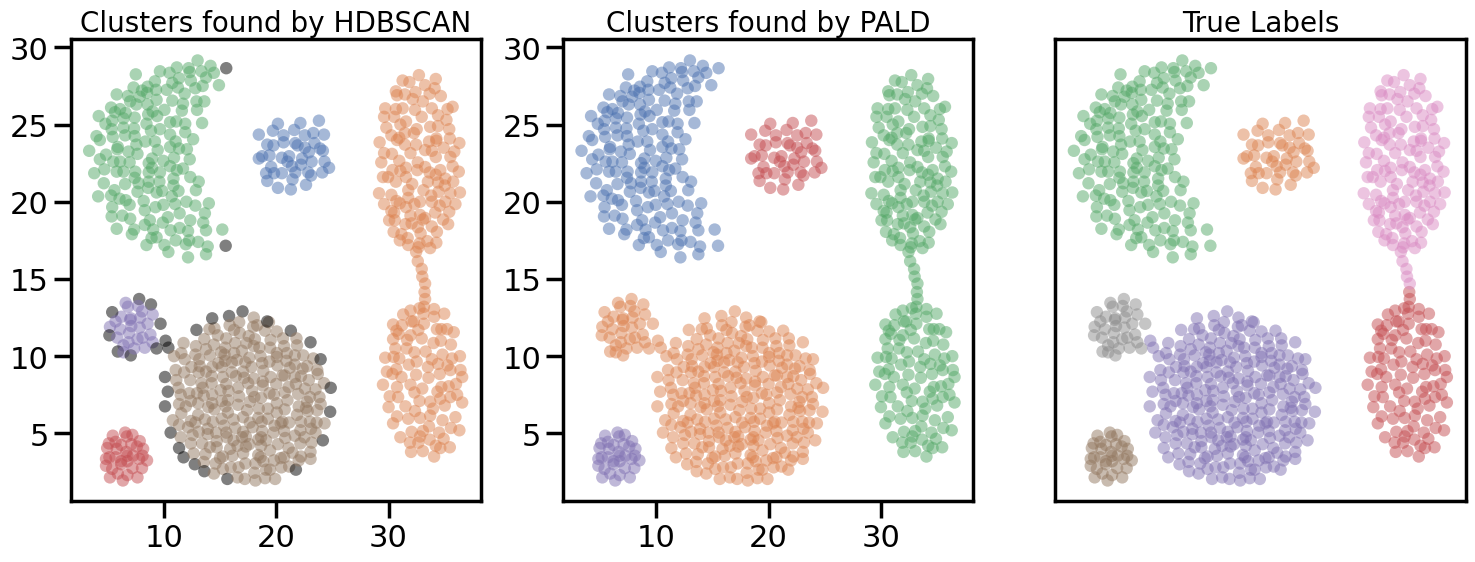

In [3]:
aggregation = np.loadtxt("aggregation.txt")
data = aggregation[:, 0:2]
labels = aggregation[:, 2].astype("int64")

plot_clusters(data, labels)